# Numerical Methods Assignment
### Student: Gabriel Nagy
## Problem 1 - Longest Ladder
![Figure 2](img/figure2.png)

The length of the longest ladder that can negotiate the corner depicted in Figure 2 can be determined
by computing the value of $\theta$ that minimizes the following function: $$L(\theta) = \frac{w_1}{sin \theta} + \frac{w_2}{sin(\pi - \alpha - \theta)}$$

For the case where $w_1 = w_2 = 2m$, use a numerical method to develop a plot of $L$ versus a range of $\alpha$'s from 45 to 135 degrees.

In [1]:
%matplotlib ipympl

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [3]:
# Python's built-in range function assumes an exclusive range,
# here we define an inclusive method to help us in iterating alphas and thetas
def closed_range(start, stop, step=1):
    d = 1 if (step > 0) else -1
    return range(start, stop + d, step)

In [4]:
# we initialize w1 and w2 with values from the problem text
w1 = 2
w2 = 2

Next, we define:
$$L(\theta) = \frac{w_1}{sin \theta} + \frac{w_2}{sin(\pi - \alpha - \theta)}$$
as a Python function. We make use of `numpy`'s sine, pi and radian conversion functions to accurately convert our input.

**NumPy** is a  widely-used scientific computation library for Python. Some of its features are (from their website):
* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

As they are both interpreted languages, using NumPy in Python gives functionality comparable to MATLAB.

In [5]:
# helper function to compute the value of L(theta)
def L_theta(theta, alpha):
    return w1 / np.sin(np.deg2rad(theta)) + w2 / np.sin(np.deg2rad(np.rad2deg(np.pi) - alpha - theta))

For the next part, we iterate our given $\alpha$ values. For each $\alpha$, we map our previously function to it, along with $\theta$, making sure to save the minimum of each iteration to a list.

In [6]:
min_list = []
for alpha in closed_range(45, 135):
    results = [L_theta(theta, alpha) for theta in closed_range(10, 179-135)]
    min_list.append(min(results))

print(min_list)

[4.879417735339269, 4.879113079251453, 4.879417735339269, 4.880332167849096, 4.881857771247295, 4.883996875413797, 4.886752754338147, 4.890129638378486, 4.894132730169149, 4.898768224288689, 4.9040433308274585, 4.909966303022943, 4.916546469161881, 4.923794268981512, 4.931721294838236, 4.940340337951249, 4.949665440071619, 4.959711950974657, 4.970496592225748, 4.982037527727988, 4.994354441624794, 5.007468624203277, 5.021403066525511, 5.036182564606619, 5.051833834062045, 5.068385636263546, 5.085868917176436, 5.10431696020183, 5.123765554520174, 5.144253180629532, 5.165821214998093, 5.188514156009957, 5.212379873682114, 5.237469885975646, 5.263839664923347, 5.291548976259263, 5.320662256774365, 5.3512490342510315, 5.383384395563905, 5.41714950939661, 5.452632211037788, 5.4899276579160095, 5.529139065949075, 5.570378538464205, 5.613768001448643, 5.659440261284811, 5.707540203997643, 5.7582261585029055, 5.811671450530703, 5.8651167425585, 5.921511471008467, 5.977906199458435, 6.037459273

For a better understanding of our results, we plot them with the help of `matplotlib`. Matplotlib is a 2D plotting library for Python. It can do histograms, power spectra, bar charts, error charts, scatterplots, with just a few lines of code. For our use case, a simple plot will suffice.

FigureCanvasNbAgg()

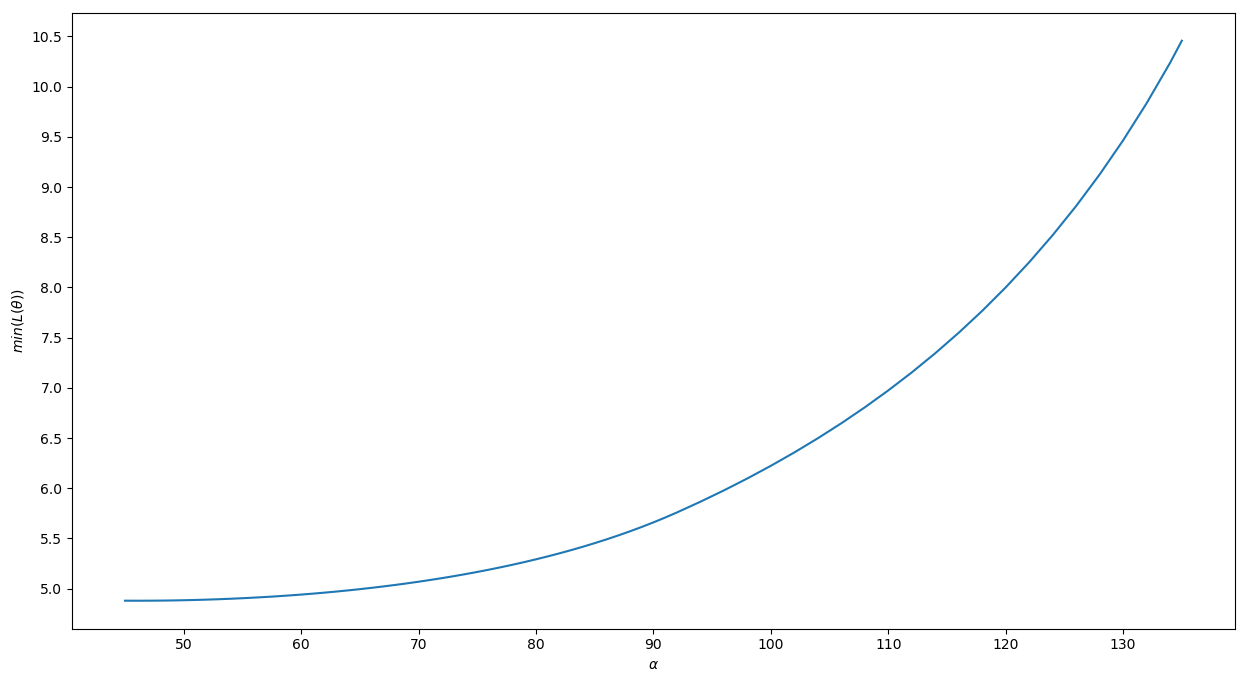

In [7]:
# we plot a graph with our processed data
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(list(closed_range(45, 135)), min_list)

# show more axis ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))

ax.set(xlabel=r'$\alpha$', ylabel=r'$min(L(\theta))$')

display(fig)

In conclusion, depending on the corner's angle, one can fit some pretty big ladders through those hallways.

## Problem 2 - Population estimates
Many fields of engineering require accurate population estimates. For example, transportation engineers might find it necessary to determine separately the population growth trends of a city and its adjacent suburbs. The population of the urban area is declining with time according to
$$P_u(t) = P_{u,max}e^{-k_ut}+P_{u,min},$$
while the suburban population is growing, as in
$$P_s(t) = \frac{P_{s,max}}{1 + (P_{s,max}/P_0 - 1)e^{-k_st}},$$
where $P_{u,max}$, $k_u$, $P_{s,max}$, $P_0$, and $k_s$ are empirically derived parameters. Determine the time and corresponding values of $P_u(t)$ and $P_s(t)$ for the case when the suburbs are 20% larger than the city.
The parameter values are $P_{u,max} = 80,000$, $k_u = 0.05/year$, $P_{u,min} = 110,000$ people, $P_{s,max} = 320,000$ people, $P_0 = 10,000$ people, and $k_s = 0.09/yr$. To obtain your solutions, use (a) graphical, and (b) false-position methods.

We begin by initializing our variables and functions:

In [8]:
# we initialize our variables
Pu_max = 80000
ku = 0.05 # / year
Pu_min = 110000 # people
Ps_max = 320000 # people
Po = 10000 # people
ks = 0.09 # / year
t = closed_range(0, 100) # time iterator

In [9]:
# below we define the functions related to the population estimates
def population_urban(time):
    return Pu_max * np.exp(-ku * time) + Pu_min

def population_suburban(time):
    return Ps_max / (1 + (Ps_max / Po - 1) * np.exp(-ks * time))

As we need to find out when the suburbs are 20% larger than the city, we define the following function:
$$L(t) = 1.2 \cdot P_u(t) - P_s(t)$$
which should evaluate to 0 when the condition holds.

In [10]:
# helper function for determining population when suburbs are 20% larger than the city
def larger_suburbs(time):
    return 1.2 * population_urban(time) - population_suburban(time)

For the graphic method, we simply plot our graph, mapping the population functions to a range of time from 0 to 100.

FigureCanvasNbAgg()

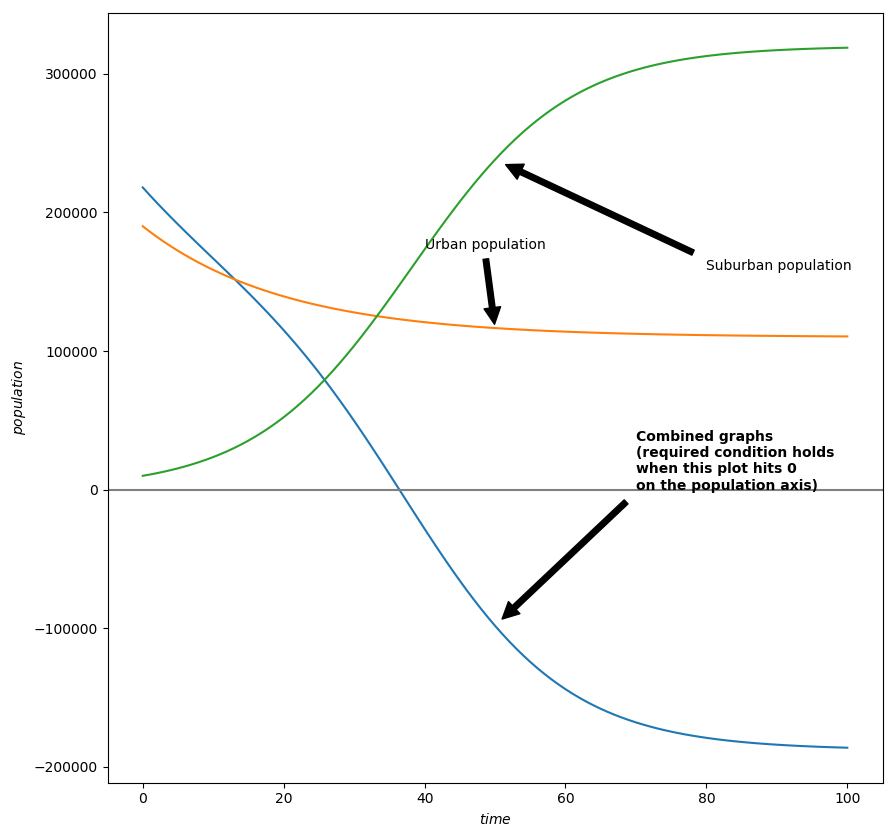

In [11]:
## (a) - graphic method
# we plot a graph with our processed data
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.plot(list(t), [larger_suburbs(time) for time in list(t)])
ax.plot(list(t), [population_urban(time) for time in list(t)])
ax.plot(list(t), [population_suburban(time) for time in list(t)])

# some annotations
ax.annotate('Combined graphs\n(required condition holds\nwhen this plot hits 0\non the population axis)', xy=(list(t)[50], larger_suburbs(list(t)[50])), xytext=(list(t)[70], list(t)[70]),
            arrowprops=dict(facecolor='black', shrink=0.05), weight='bold')
ax.annotate('Urban population', xy=(list(t)[50], population_urban(list(t)[50])), xytext=(list(t)[40], population_suburban(list(t)[40])),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Suburban population', xy=(list(t)[50], population_suburban(list(t)[50])), xytext=(list(t)[80], population_urban(list(t)[10])),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.axhline(0, color='gray')

ax.set(xlabel=r'$time$', ylabel=r'$population$')

display(fig)

For the false-position (regula falsi) method, we take some arbitrary times for our lower and upper bounds, and we try to find a root with the following formula:

$$x_r=x_u - L(x_u) \frac{x_l-x_u}{L(x_l) - L(x_u)}$$

Where $x_r$, $x_u$, and $x_l$ are our root, lower, and upper bounds, and $L$ is our previously defined function, corresponding to `larger_suburbs(time)` in Python.

In [12]:
## (b) - false-position method
x_l = 50
x_u = 20

# we iterate a couple of times to find our root
for i in range(10):
    # x_r is our estimated root
    x_r = x_u - ((larger_suburbs(x_u) * (x_l - x_u)) / (larger_suburbs(x_l) - larger_suburbs(x_u)))
    if larger_suburbs(x_l) * larger_suburbs(x_r) < 0:  # if results are of different signs
        x_u = x_r 
    elif larger_suburbs(x_l) * larger_suburbs(x_r) > 0:
        x_l = x_r
    # we check to a precision of 15 digits, otherwise it goes on for a long time
    if '{0:15f}'.format(x_r) == '{0:15f}'.format(x_l) == '{0:15f}'.format(x_u):
        print("Found the root at time={}, after {} iterations.".format(x_r, i))
        break

Found the root at time=36.421079372066856, after 5 iterations.


To get the corresponding populations for this time value, we just call our functions:

In [21]:
print("Urban population: {:.0f}".format(population_urban(x_r)))
print("Subrban population: {:.0f}".format(population_suburban(x_r)))

Urban population: 122948
Subrban population: 147538
